In [1]:
from MES_LSTM.model import *
from utils.metrics import *

import warnings
warnings.simplefilter('ignore')

# check version
print(tf.keras.__version__)
print(tf.__version__)
print(tfp.__version__)
print(tf.config.list_physical_devices('GPU'))



2.4.0
2.4.1
0.12.2
[]


2021-09-15 06:04:50.471621: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [2]:
pre_layer = preprocess(first_time = 0) # change to 1 if first time running to download data
df = pre_layer.load_data()
df = pre_layer.clean_data(df)
df = pre_layer.fill_missing(df)
scaled_df, df_scaler = pre_layer.scale(df)
scaled_df

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[INFO] data cleaned
[INFO] the dataframe has 28 columns in total and 15 columns that have missing values.
                         Missing Values  % of Total Values
weekly_icu_admissions               593              100.0
total_boosters                      593              100.0
handwashing_facilities              593              100.0
weekly_hosp_admissions              517               87.2
excess_mortality                    512               86.3
people_fully_vaccinated             346               58.3
total_vaccinations                  342               57.7
people_vaccinated                   342               57.7
positive_rate                        68               11.5
icu_patients                         66               11.1
total_tests                          61               10.3
hosp_patients                        60               10.1
total_deaths                         35                5.9
reproduction_rate                    34                5.7
stringenc

,total_cases,total_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
2020-01-31,1.000000,1.210391,1.548914,1.230914,1.221537,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-01,1.000000,1.210391,1.548914,1.230914,1.221537,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-02,1.000000,1.210631,1.535423,1.229725,1.220355,1.000206,1.016816,1.034911,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-03,1.000001,1.210631,1.535423,1.229725,1.220355,1.000207,1.016815,1.034911,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-04,1.000001,1.210631,1.535423,1.229725,1.220355,1.000207,1.016815,1.034911,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-10,1.984321,1.996579,1.156463,1.247697,1.194522,1.985457,1.278177,1.447696,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-11,1.988271,1.997737,1.149660,1.572792,1.485696,1.988217,1.275878,1.447696,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-12,1.992185,1.998152,1.146259,1.579156,1.491307,1.992235,1.273579,1.447696,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-13,1.996342,1.998612,1.287936,1.586741,1.498079,1.996107,1.273579,1.447696,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [3]:
mes_layer = ES()
params, internals = mes_layer.es(scaled_df)
es_scaled, df_trend, df_seas = mes_layer.deTS(scaled_df, internals)

es_scaled

               SES  Add_Trend  Mult_Trend Add_Seasonality Mult_Seasonality  \
$\alpha$  1.000000   0.995000    0.995000             NaN              NaN   
$\beta$        NaN   0.900238    0.900238             NaN              NaN   
$\gamma$       NaN        NaN         NaN             NaN              NaN   
$l_0$     1.000000   1.000000    1.000000             NaN              NaN   
$b_0$          NaN   0.000000    1.000000             NaN              NaN   
SSE       0.003996   0.000074    0.000075             NaN              NaN   

          Add_Trend_Seas  Mult_Trend_Add_Seas  Add_Trend_Mult_Seas  \
$\alpha$    9.950000e-01             0.995000         9.950000e-01   
$\beta$     8.883929e-01             0.888393         8.883929e-01   
$\gamma$    9.999935e-05             0.000100         9.999979e-05   
$l_0$       1.318437e+00             1.318437         1.318438e+00   
$b_0$      -6.032578e-07             0.999999        -4.557500e-08   
SSE         6.783445e-05         

,total_cases,total_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
2020-01-31,-7.418023e-07,6.898370e-06,-3.697043e-14,-0.000048,-3.009913e-12,-5.551115e-17,-1.416645e-13,1.377787e-13,7.212999e-10,7.212999e-10,7.212999e-10,7.212999e-10,7.212999e-10,7.212999e-10,7.212999e-10,7.212999e-10,7.212999e-10,7.212999e-10,7.212999e-10,7.212999e-10
2020-02-01,7.033000e-07,4.745109e-06,1.192313e-11,-0.000086,-1.009512e-11,1.110223e-16,-9.878709e-12,-1.574851e-12,1.438983e-09,1.438983e-09,1.438983e-09,1.438983e-09,1.438983e-09,1.438983e-09,1.438983e-09,1.438983e-09,1.438983e-09,1.438983e-09,1.438983e-09,1.438983e-09
2020-02-02,5.056138e-07,8.952217e-06,-1.244038e-10,-0.000007,-3.787292e-11,-1.387779e-15,4.294015e-11,7.922440e-12,2.153076e-09,2.153076e-09,2.153076e-09,2.153076e-09,2.153076e-09,2.153076e-09,2.153076e-09,2.153076e-09,2.153076e-09,2.153076e-09,2.153076e-09,2.153076e-09
2020-02-03,2.052033e-07,7.739365e-06,9.442769e-11,-0.000025,-4.517352e-11,-1.887379e-15,-1.227785e-11,-2.617018e-12,2.863599e-09,2.863599e-09,2.863599e-09,2.863599e-09,2.863599e-09,2.863599e-09,2.863599e-09,2.863599e-09,2.863599e-09,2.863599e-09,2.863599e-09,2.863599e-09
2020-02-04,-3.209279e-08,6.508477e-07,2.672418e-11,0.000049,3.888215e-11,3.497203e-15,-2.443967e-11,-3.378298e-12,3.570567e-09,3.570567e-09,3.570567e-09,3.570567e-09,3.570567e-09,3.570567e-09,3.570567e-09,3.570567e-09,3.570567e-09,3.570567e-09,3.570567e-09,3.570567e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-10,-3.619534e-07,1.104476e-05,8.104678e-11,-0.000036,5.319815e-11,-4.163336e-15,-3.605560e-12,-1.544320e-13,1.329539e-07,1.329539e-07,1.329539e-07,1.329539e-07,1.329539e-07,1.329539e-07,1.329539e-07,1.329539e-07,1.329539e-07,1.329539e-07,1.329539e-07,1.329539e-07
2021-09-11,-4.834793e-06,-4.212983e-07,4.588563e-11,0.012382,3.479231e-09,9.436896e-16,-2.777389e-12,2.379208e-13,1.329800e-07,1.329800e-07,1.329800e-07,1.329800e-07,1.329800e-07,1.329800e-07,1.329800e-07,1.329800e-07,1.329800e-07,1.329800e-07,1.329800e-07,1.329800e-07
2021-09-12,-3.383196e-07,-7.195052e-07,3.064876e-11,-0.001411,-4.519525e-10,3.774758e-15,-4.157841e-12,-5.073719e-13,1.330059e-07,1.330059e-07,1.330059e-07,1.330059e-07,1.330059e-07,1.330059e-07,1.330059e-07,1.330059e-07,1.330059e-07,1.330059e-07,1.330059e-07,1.330059e-07
2021-09-13,1.314887e-06,1.077061e-07,1.290461e-09,-0.001724,-4.055290e-10,3.663736e-15,4.897860e-12,7.099876e-13,1.330316e-07,1.330316e-07,1.330316e-07,1.330316e-07,1.330316e-07,1.330316e-07,1.330316e-07,1.330316e-07,1.330316e-07,1.330316e-07,1.330316e-07,1.330316e-07


[INFO] data shape: train = (534, 20), valid = (14, 20), test = (45, 20), x_train = (534, 18), y_train = (534, 2), x_valid = (14, 18), y_valid = (14, 2), x_test = (45, 18)


2021-09-15 06:07:01.824457: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-15 06:07:01.852006: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               101400    
_________________________________________________________________
dense (Dense)                (None, 2)                 302       
Total params: 101,702
Trainable params: 101,702
Non-trainable params: 0
_________________________________________________________________
None


2021-09-15 06:07:02.874382: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-15 06:07:02.889811: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2600165000 Hz


Epoch 1/15
17/17 [==============================] - 6s 158ms/step - loss: 4.1719e-07 - val_loss: 2.9449e-08
Epoch 2/15
17/17 [==============================] - 0s 19ms/step - loss: 2.4846e-08 - val_loss: 9.5768e-09
Epoch 3/15
17/17 [==============================] - 0s 18ms/step - loss: 4.7721e-09 - val_loss: 3.0425e-09
Epoch 4/15
17/17 [==============================] - 0s 19ms/step - loss: 6.8653e-10 - val_loss: 2.2409e-09
Epoch 5/15
17/17 [==============================] - 0s 18ms/step - loss: 3.5612e-09 - val_loss: 1.4280e-09
Epoch 6/15
17/17 [==============================] - 0s 18ms/step - loss: 7.1708e-10 - val_loss: 4.1079e-10
Epoch 7/15
17/17 [==============================] - 0s 18ms/step - loss: 3.6274e-09 - val_loss: 8.9581e-10
Epoch 8/15
17/17 [==============================] - 0s 18ms/step - loss: 1.3037e-09 - val_loss: 4.5098e-10
Epoch 9/15
17/17 [==============================] - 0s 18ms/step - loss: 7.4761e-10 - val_loss: 1.9343e-09
Epoch 10/15
17/17 [=================

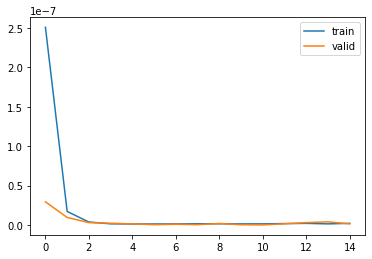

In [4]:
dl_layer = lstm()
train, valid, test, x_train, y_train, x_valid, y_valid, x_test = dl_layer.split(es_scaled)
y_pred_es_scaled = dl_layer.forecast_model(test, x_train, y_train, x_valid, y_valid, x_test)

     total_deaths_true  total_deaths_pred  total_cases_true  total_cases_pred
562           131269.0      131268.095351         6297157.0      6.297366e+06
563           131296.0      131295.251280         6325515.0      6.325701e+06
564           131466.0      131465.554026         6352224.0      6.352424e+06
565           131577.0      131576.916948         6385982.0      6.386147e+06
566           131691.0      131690.377908         6422515.0      6.422697e+06
567           131805.0      131802.984523         6459643.0      6.459828e+06
568           131909.0      131908.789178         6491529.0      6.491736e+06
569           131958.0      131957.310118         6523563.0      6.523754e+06
570           132000.0      131999.275490         6555419.0      6.555611e+06
571           132174.0      132173.125176         6586181.0      6.586387e+06
572           132323.0      132322.531748         6621799.0      6.621980e+06
573           132465.0      132464.499982         6659916.0     

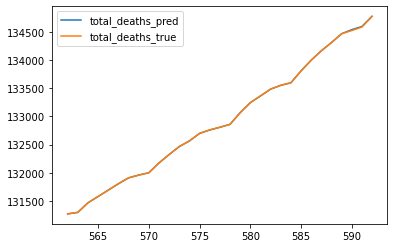

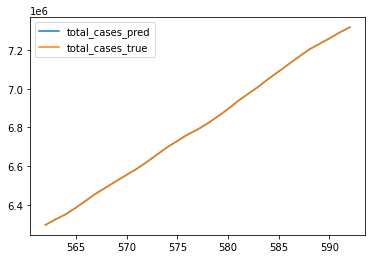

In [5]:
forecasts = dl_layer.reTS(y_pred_es_scaled, es_scaled, train, valid, df_trend, df_seas, df_scaler, df)

### prediction intervals

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               101400    
_________________________________________________________________
dense_flipout (DenseFlipout) (None, 2)                 602       
Total params: 102,002
Trainable params: 102,002
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
17/17 [==============================] - 3s 52ms/step - loss: 759.2950 - val_loss: 755.2761
Epoch 2/15
17/17 [==============================] - 0s 16ms/step - loss: 753.9047 - val_loss: 750.0365
Epoch 3/15
17/17 [==============================] - 0s 16ms/step - loss: 748.7712 - val_loss: 744.8680
Epoch 4/15
17/17 [==============================] - 0s 16ms/step - loss: 743.5866 - val_loss: 739.7549
Epoch 5/15
17/17 [==============================] - 0s 17ms/step - loss: 738.5123 - val_loss:

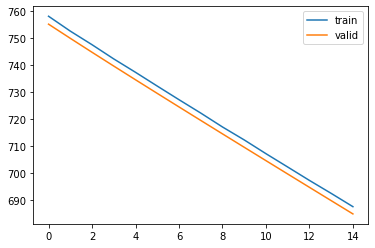

   total_deaths_lower  total_cases_lower  total_deaths_upper  \
0           -0.025731          -0.012252            0.021512   
1           -0.026287          -0.011084            0.026712   
2           -0.028139          -0.015037            0.025836   
3           -0.028219          -0.015085            0.022031   
4           -0.024235          -0.015005            0.016200   

   total_cases_upper  
0           0.039299  
1           0.042926  
2           0.033248  
3           0.038845  
4           0.045242  


In [6]:
pi_pred_es_scaled = dl_layer.pi_model(test, x_train, y_train, x_valid, y_valid, x_test)

     total_deaths_true  total_deaths_lower  total_cases_lower  \
562           131269.0       127800.993064       6.207520e+06   
563           131296.0       127753.183031       6.244407e+06   
564           131466.0       127673.828728       6.242206e+06   
565           131577.0       127774.346189       6.275581e+06   
566           131691.0       128424.968018       6.312711e+06   
567           131805.0       127557.861112       6.378950e+06   
568           131909.0       128150.286257       6.365147e+06   
569           131958.0       127747.519694       6.396944e+06   
570           132000.0       128171.265218       6.445414e+06   
571           132174.0       128813.396344       6.480196e+06   
572           132323.0       128326.975930       6.489415e+06   
573           132465.0       127573.295760       6.559424e+06   
574           132566.0       128626.743851       6.611003e+06   
575           132699.0       128918.131947       6.635391e+06   
576           132760.0   

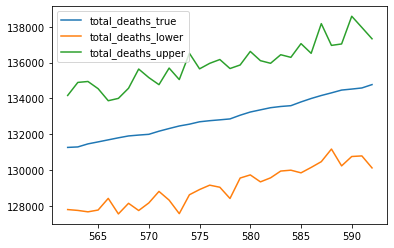

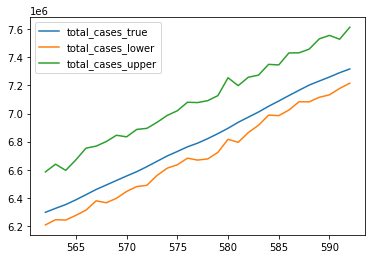

In [7]:
pi = dl_layer.reTS_pi(pi_pred_es_scaled, es_scaled, train, valid, df_trend, df_seas, df_scaler, df)

In [8]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

6857.75180381373
394355.17076518416


In [9]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

100.0
100.0


In [10]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

0.0013004378070828075
0.0027583842730576607


In [11]:
print(mase(train, forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(mase(train, forecasts['total_cases_true'], forecasts['total_cases_pred']))

3439.2926550237257
369261.7106016705


# RNN

[INFO] data shape: train = (534, 20), valid = (14, 20), test = (45, 20), x_train = (534, 18), y_train = (534, 2), x_valid = (14, 18), y_valid = (14, 2), x_test = (45, 18)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 150)               101400    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 302       
Total params: 101,702
Trainable params: 101,702
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
17/17 [==============================] - 2s 34ms/step - loss: 1.0189 - val_loss: 0.9548
Epoch 2/15
17/17 [==============================] - 0s 16ms/step - loss: 0.0720 - val_loss: 0.5086
Epoch 3/15
17/17 [==============================] - 0s 19ms/step - loss: 0.1442 - val_loss: 0.5791
Epoch 4/15
17/17 [===================

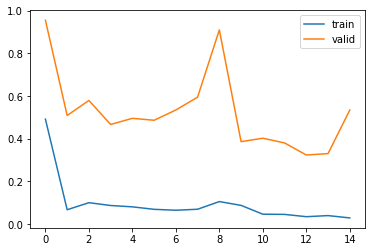

     total_deaths_true  total_deaths_pred  total_cases_true  total_cases_pred
562           131269.0      114964.511845         6297157.0      3.495521e+06
563           131296.0      115153.707340         6325515.0      3.506365e+06
564           131466.0      115322.755829         6352224.0      3.517832e+06
565           131577.0      115498.664583         6385982.0      3.529371e+06
566           131691.0      115663.037809         6422515.0      3.542487e+06
567           131805.0      115870.982553         6459643.0      3.555103e+06
568           131909.0      116097.692610         6491529.0      3.567255e+06
569           131958.0      116337.560880         6523563.0      3.580271e+06
570           132000.0      116557.812328         6555419.0      3.593492e+06
571           132174.0      116734.267332         6586181.0      3.608514e+06
572           132323.0      116978.891196         6621799.0      3.621931e+06
573           132465.0      117270.621139         6659916.0     

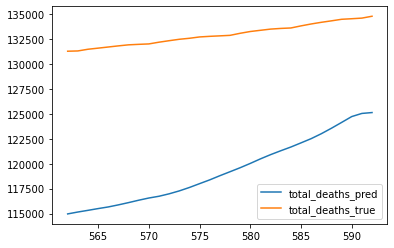

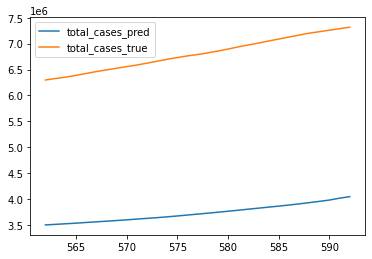

In [12]:
dl_layer = lstm(results_path = 'results/pure_lstm/')
train, valid, test, x_train, y_train, x_valid, y_valid, x_test = dl_layer.split(scaled_df)
y_pred_scaled = dl_layer.forecast_model(test, x_train, y_train, x_valid, y_valid, x_test)

forecasts = dl_layer.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)

### prediction intervals

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 150)               101400    
_________________________________________________________________
dense_flipout_1 (DenseFlipou (None, 2)                 602       
Total params: 102,002
Trainable params: 102,002
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
17/17 [==============================] - 3s 43ms/step - loss: 760.4389 - val_loss: 756.5522
Epoch 2/15
17/17 [==============================] - 0s 17ms/step - loss: 754.5979 - val_loss: 751.1259
Epoch 3/15
17/17 [==============================] - 0s 18ms/step - loss: 749.4005 - val_loss: 745.9801
Epoch 4/15
17/17 [==============================] - 0s 17ms/step - loss: 744.2728 - val_loss: 740.8129
Epoch 5/15
17/17 [==============================] - 0s 19ms/step - loss: 739.1712 - val_loss:

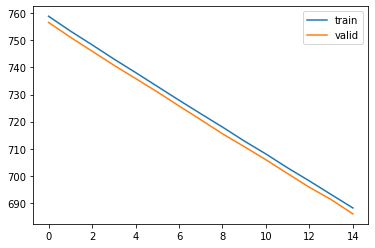

   total_deaths_lower  total_cases_lower  total_deaths_upper  \
0            1.455427           1.117718            2.615047   
1            1.541890           1.084317            2.535458   
2            1.541275           1.219990            2.616781   
3            1.496960           1.178720            2.714627   
4            1.454199           1.033340            2.600684   

   total_cases_upper  
0           2.351292  
1           2.242634  
2           2.378913  
3           2.436349  
4           2.345400  
     total_deaths_true  total_deaths_lower  total_cases_lower  \
562           131269.0        61380.278726       8.613376e+05   
563           131296.0        73033.196573       6.169427e+05   
564           131466.0        72950.228340       1.609652e+06   
565           131577.0        66977.822507       1.307682e+06   
566           131691.0        61214.718207       2.439470e+05   
567           131805.0        62441.427516       2.878004e+05   
568           131909.0

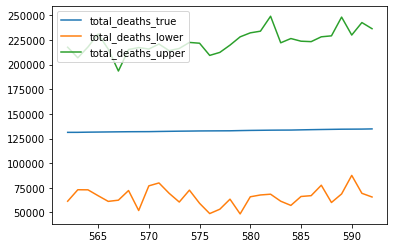

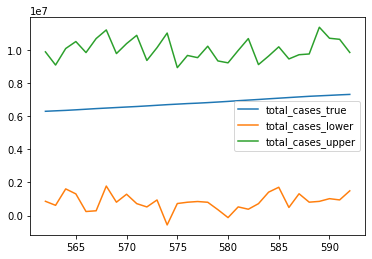

In [13]:
pi_pred_scaled = dl_layer.pi_model(test, x_train, y_train, x_valid, y_valid, x_test)

pi = dl_layer.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [14]:
pi.head()

,total_deaths_true,total_deaths_lower,total_cases_lower,total_cases_true,total_deaths_upper,total_cases_upper
562,131269.0,61380.278726,8.613376e+05,6297157.0,217665.737612,9.887313e+06
563,131296.0,73033.196573,6.169427e+05,6325515.0,206939.292883,9.092268e+06
564,131466.0,72950.228340,1.609652e+06,6352224.0,217899.426824,1.008941e+07
565,131577.0,66977.822507,1.307682e+06,6385982.0,231086.394640,1.050967e+07
566,131691.0,61214.718207,2.439470e+05,6422515.0,215729.929980,9.844198e+06


In [15]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

157572.2745714946
9208348.867511217


In [16]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

100.0
100.0


In [17]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

10.827175150743415
58.45773214219577


In [ ]:
print(mase(train, forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(mase(train, forecasts['total_cases_true'], forecasts['total_cases_pred']))

# VARMAX

In [ ]:
bench = stats()
train, test, x_train, x_test = bench.split(scaled_df)
y_pred_scaled, pi_pred_scaled = bench.forecast_varmax(test, x_train, y_train, x_test)
forecasts = bench.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)
pi = bench.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [20]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

516946.04053522326
336675.1746216913


In [21]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

0.0
100.0


In [22]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

20.68758789645125
0.5239131662948395


In [23]:
print(mase(train, forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(mase(train, forecasts['total_cases_true'], forecasts['total_cases_pred']))

11689.283806968353
13345.729552865469


# SARIMAX

                               SARIMAX Results                                
Dep. Variable:           total_deaths   No. Observations:                  534
Model:               SARIMAX(1, 0, 0)   Log Likelihood                1650.054
Date:                Wed, 15 Sep 2021   AIC                          -3260.108
Time:                        06:08:10   BIC                          -3174.500
Sample:                    01-31-2020   HQIC                         -3226.610
                         - 07-17-2021                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
reproduction_rate          -0.0769      0.032     -2.394      0.017      -0.140      -0.014
icu_patients                0.0132      0.070      0.189      0.850      -0.124       0.150


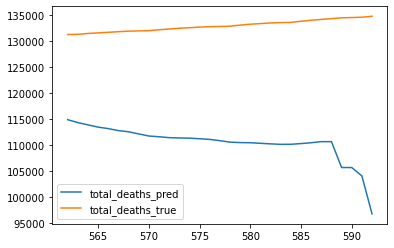

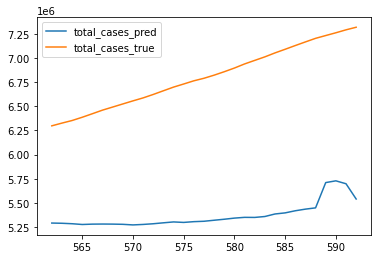

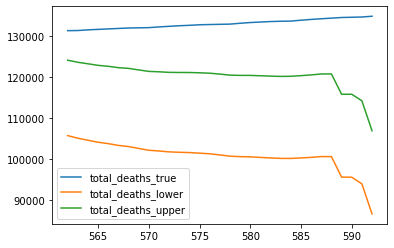

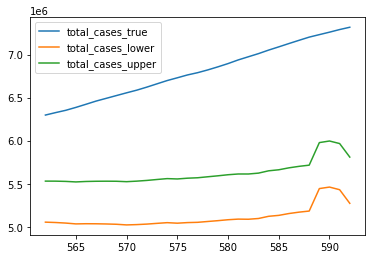

In [24]:
bench = stats(results_path = 'results/sarimax/')
# train, test, x_train, x_test = bench.split(scaled_df)
y_pred_scaled, pi_pred_scaled = bench.forecast_sarimax(test, x_train, y_train, x_test)
forecasts = bench.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)
pi = bench.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [25]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

272841.2261501482
24061462.233880002


In [26]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

0.0
0.0


In [27]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

18.469094554771697
23.48522069511916


In [28]:
print(mase(train, forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(mase(train, forecasts['total_cases_true'], forecasts['total_cases_pred']))

8522.368531630422
544908.5232096472


# MLR

                            OLS Regression Results                            
Dep. Variable:           total_deaths   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     3048.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):               0.00
Time:                        06:08:12   Log-Likelihood:                 806.63
No. Observations:                 534   AIC:                            -1599.
Df Residuals:                     527   BIC:                            -1569.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
reproduction_rate         

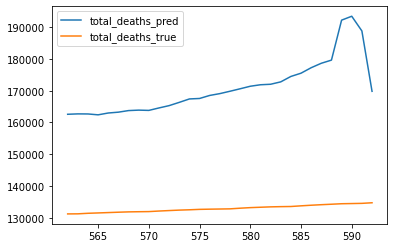

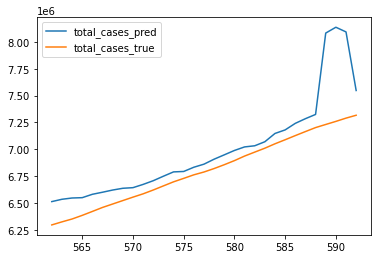

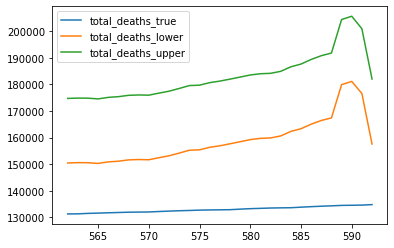

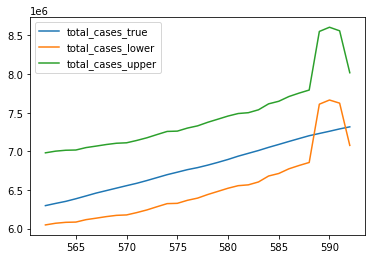

In [29]:
bench = stats(results_path = 'results/mlr/')
# train, test, x_train, x_test = bench.split(scaled_df)
y_pred_scaled, pi_pred_scaled = bench.forecast_mlr(test, x_train, y_train, x_test)
forecasts = bench.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)
pi = bench.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [30]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

538414.2510352378
1655651.966071849


In [31]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

0.0
90.32258064516128


In [32]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

24.81770977057298
2.603515301678866


In [33]:
print(mase(train, forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(mase(train, forecasts['total_cases_true'], forecasts['total_cases_pred']))

14388.626450761241
70619.07162840689
